In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pose import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
reps = {}
main(reps)

In [3]:
rep_no = list(range(1, reps['count']))
time = list(reps['time'].values())[:reps['count']-1]
correct_form = list(reps['correct_form'].values())[1:reps['count']]
wrong_form = list(reps['wrong_form'].values())[1:reps['count']]

In [4]:
data = [rep_no, time, correct_form, wrong_form]
columns = ['rep_no', 'time', 'correct_form', 'wrong_form']

In [5]:
data = pd.DataFrame(data, columns).transpose()

In [6]:
data.head()

,rep_no,time,correct_form,wrong_form
0,1.0,2.482618,2.482618,0.000000
1,2.0,2.613057,2.613057,0.000000
2,3.0,2.694372,2.648705,0.045667
3,4.0,2.525628,2.525628,0.000000
4,5.0,2.717479,2.717479,0.000000


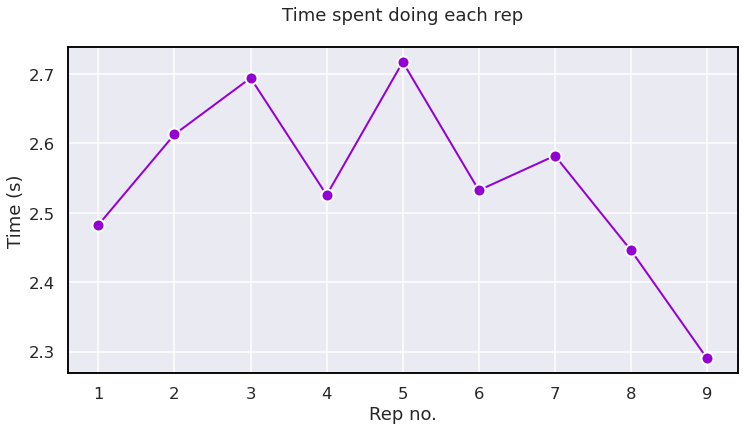

In [21]:
figure = plt.figure(figsize=(12, 6))

sns.set_style('darkgrid', {'axes.edgecolor': 'black'})
sns.set_context('talk')
sns.lineplot(data=data, x='rep_no', y='time',
             color='darkviolet', lw=2,
            marker='o', ms=12, mec='white', mew=2
            )

plt.xticks(rep_no)
plt.xlabel('Rep no.')
plt.ylabel('Time (s)')
plt.title("Time spent doing each rep\n")

plt.show()

In [ ]:
# sns.axes_style()

In [27]:
fig= go.Figure()

fig.add_trace(go.Scatter(x=data['rep_no'], y=data['time'],
                        line=dict(color='darkviolet', width=2),
#                         stackgroup='one'
                        ))

fig.update_layout(title='Time spent doing each rep',
                   xaxis_title='Rep no.',
                   yaxis_title='Time (s)',
                      xaxis=dict(dtick=1),
                      yaxis=dict(dtick=0.5),
                    plot_bgcolor='#EAEAF2',
                     font_size=15
                 )

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.show()

In [20]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    name='Wrong form',
    x=rep_no, y=wrong_form,
    text='Wrong form',
    hoverinfo='text+x+y',
    mode='lines',
    line=dict(width=3, color='red'),
    stackgroup='one' # define stack group
))

fig2.add_trace(go.Scatter(
    name='Correct form',
    x=rep_no, y=correct_form,
    text='Correct form',
    hoverinfo='text+x+y',
    mode='lines',
    line=dict(width=3, color='rgb(111, 231, 219)'),
#     line=dict(width=3, color='rgb(111, 231, 219)'),
    stackgroup='one'
))

fig2.update_layout(title='Correct form vs. Wrong form',
                   xaxis_title='Rep no.',
                   yaxis_title='Time (s)',
                      xaxis=dict(dtick=1),
                    plot_bgcolor='#EAEAF2',
                     font_size=15
                  )

fig2.show()